In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path_data = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/data'

In [3]:
path_output = '/content/drive/MyDrive/Proyecto Introduccion a la Ciencia de Datos/output'

In [4]:
df_gye = pd.read_csv(f'{path_data}/NEWDATAG.csv')

In [ ]:
df_uio = pd.read_csv(f'{path_data}/NEWDATAQ.csv')

In [ ]:
df_gye['ciudad'] = 'Guayaquil'
df_uio['ciudad'] = 'Quito'

In [ ]:
df = pd.concat([df_gye, df_uio])

In [ ]:
df.shape

(7011, 8)

In [ ]:
df.head()

,Descripcion_1,Descripcion_2,precio,mt2,latitud,longitud,Nombre_sector,ciudad
0,Departamento,Departamento en venta en Guayaquil,125000,138,-2.166655596557214,-79.945055,Ceibos,Guayaquil
1,Local,Local en venta en Garzota,2760000,2083,-2.146510773974535,-79.886783,Garzota,Guayaquil
2,Oficina/Consultorio,Oficina/Consultorio en venta en Norte De Guaya...,90000,55,-2.154740793738683,-79.890192,Ciudadela Vernaza,Guayaquil
3,Casa,Casa en venta en Guayaquil,398000,348,-2.166655596557214,-79.945055,Ceibos,Guayaquil
4,Departamento,Departamento en venta en Puerto Santa Ana,189000,80,-2.179125941420345,-79.876120,Puerto Santa Ana,Guayaquil


In [ ]:
df_ipc = pd.read_csv(f'{path_output}/ipc_anual2017.csv')

In [ ]:
df = df.merge(df_ipc[], left_on='Nombre_sector', right_on='neighborhood')

In [ ]:
#df = df[['Descripcion_1', 'Descripcion_2', 'precio', 'mt2', 'Nombre_sector', 'ingpc_mean']]
df.drop(columns=['neighborhood'], inplace=True)

In [ ]:
df.head()

,Descripcion_1,Descripcion_2,precio,mt2,latitud,longitud,Nombre_sector,ciudad,ingpc_mean,gini,ingpc_median,iqr,precioxmt2
0,Local,Local en venta en Garzota,2760000,2083,-2.146510773974535,-79.886783,Garzota,Guayaquil,501.099975,0.345838,402.5,587.126488,1325.012002
1,Departamento,Departamento en venta en Garzota,98000,115,-2.147830347463852,-79.892916,Garzota,Guayaquil,501.099975,0.345838,402.5,587.126488,852.173913
2,Departamento,Departamento en venta en Garzota,92000,90,-2.151184073895145,-79.894780,Garzota,Guayaquil,501.099975,0.345838,402.5,587.126488,1022.222222
3,Casa,Casa en venta en Garzota,145000,414,-2.150089375551135,-79.891206,Garzota,Guayaquil,501.099975,0.345838,402.5,587.126488,350.241546
4,Casa,Casa en venta en Garzota,249000,225,-2.147140749039103,-79.888040,Garzota,Guayaquil,501.099975,0.345838,402.5,587.126488,1106.666667


In [ ]:
df.shape

(4249, 13)

In [ ]:
df.isna().sum()

Descripcion_1     0
Descripcion_2     0
precio            0
mt2               0
latitud           0
longitud         94
Nombre_sector     0
ciudad            0
ingpc_mean        0
gini              0
ingpc_median      0
iqr               0
precioxmt2        0
dtype: int64

In [ ]:
df['precioxmt2'] = df['precio']/df['mt2']

In [ ]:
idx_gye = df['ciudad'] == 'Guayaquil'
idx_uio = df['ciudad'] == 'Quito'

In [ ]:
sns.set_theme(style='darkgrid')

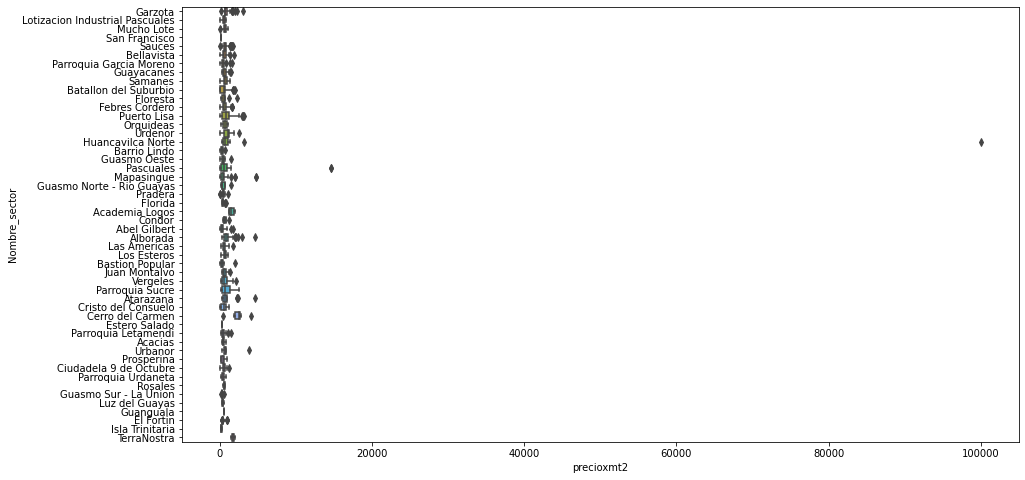

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
_ = sns.boxplot(data=df[idx_gye], x='precioxmt2', y='Nombre_sector', ax=ax)

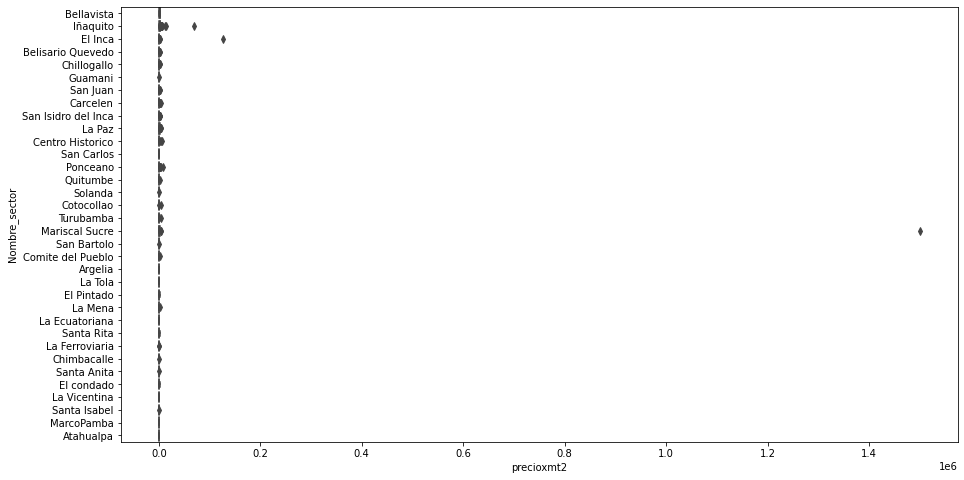

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
_ = sns.boxplot(data=df[idx_uio], x='precioxmt2', y='Nombre_sector', ax=ax)

In [ ]:
stats = df.groupby('Nombre_sector').agg({'precioxmt2': [np.mean, np.std]})

In [ ]:
stats.head()

precioxmt2            
                       mean         std
Nombre_sector                          
Abel Gilbert     410.877005  458.745714
Acacias          507.023203  151.814628
Academia Logos  1567.225461  374.473645
Alborada         860.787812  522.573852
Argelia          435.426671  231.280294

In [ ]:
stats.columns = ['mean', 'std']

In [ ]:
stats.loc['Acacias', 'mean']

507.0232027672504

In [ ]:
def estandarizar(x):
  sector = x['Nombre_sector']
  mean = stats.loc[sector, 'mean']
  std = stats.loc[sector, 'std']
  z = (x['precioxmt2']-mean)/std
  return z

In [ ]:
zscore = df.apply(estandarizar, axis=1)

In [ ]:
idx = (zscore < 3) & (zscore > -3)

In [ ]:
df = df[idx]

In [ ]:
df.shape

(4198, 13)

In [ ]:
idx_gye = df['ciudad'] == 'Guayaquil'
idx_uio = df['ciudad'] == 'Quito'

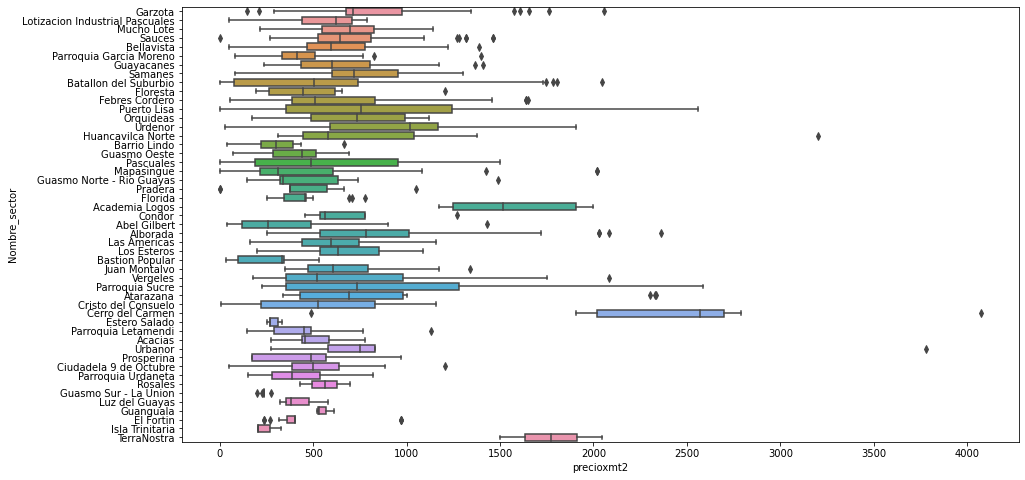

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
_ = sns.boxplot(data=df[idx_gye], x='precioxmt2', y='Nombre_sector', ax=ax)

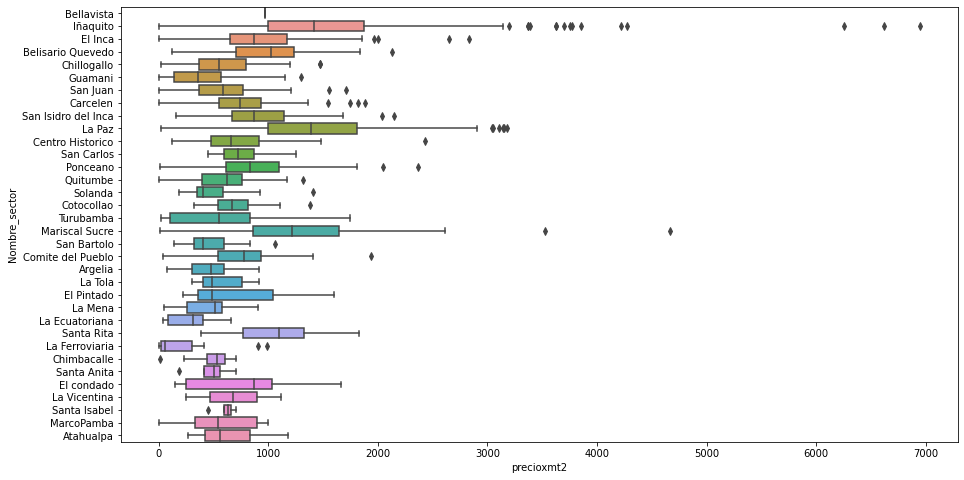

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
_ = sns.boxplot(data=df[idx_uio], x='precioxmt2', y='Nombre_sector', ax=ax)

In [ ]:
count_gye= df[idx_gye].groupby('Nombre_sector')['Descripcion_1'].count().sort_values(ascending=False).reset_index()

In [ ]:
count_uio = df[idx_uio].groupby('Nombre_sector')['Descripcion_1'].count().sort_values(ascending=False).reset_index()

In [ ]:
count_gye.columns = ['sector', 'propiedades']
count_uio.columns = ['sector', 'propiedades']

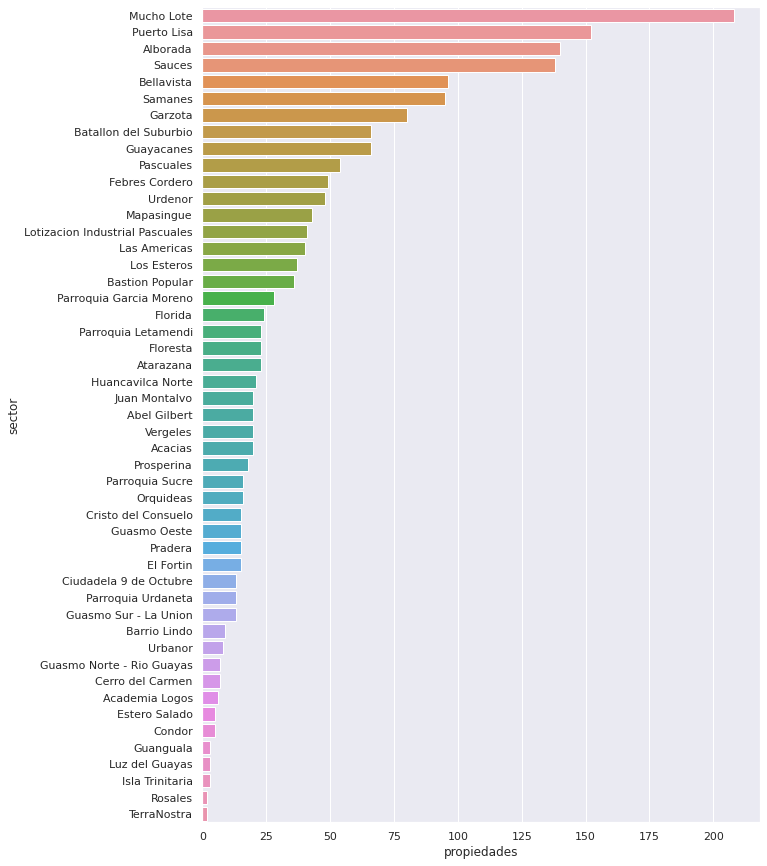

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))
_ = sns.barplot(data=count_gye, x='propiedades', y='sector', ax=ax)


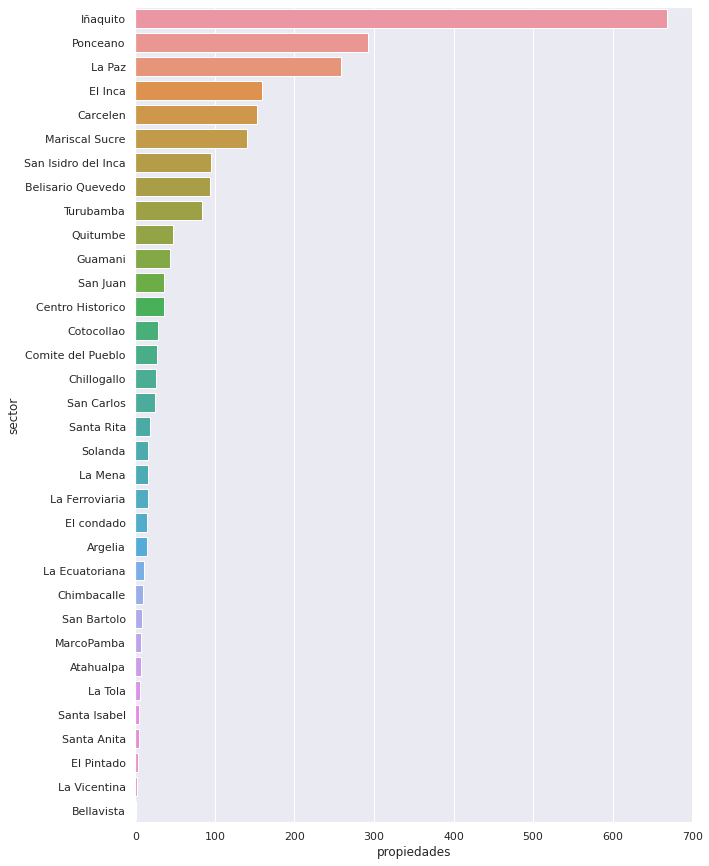

In [ ]:
fig, ax = plt.subplots(figsize=(10, 15))
_ = sns.barplot(data=count_uio, x='propiedades', y='sector', ax=ax)


In [ ]:
metrics = df.groupby('Nombre_sector')['precioxmt2', 'ingpc_mean'].mean().reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
metrics.columns=['sector', 'pmc', 'ingpc_mean']

In [ ]:
metrics.corr()

,pmc,ingpc_mean
pmc,1.00000,0.62983
ingpc_mean,0.62983,1.00000


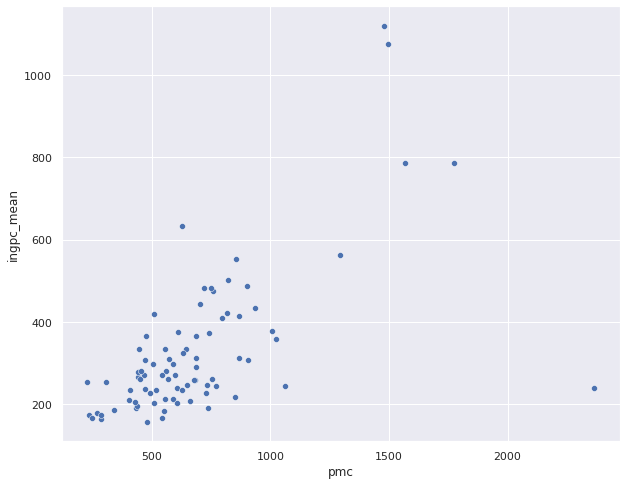

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
_ = sns.scatterplot(data=metrics, x='pmc', y='ingpc_mean', ax=ax)

In [ ]:
metrics[['sector', 'pmc']].to_csv(f'{path_output}/precioxmt2.csv', index=False)

In [ ]:
metrics

,sector,pmc,ingpc_mean
0,Abel Gilbert,341.420856,186.582404
1,Acacias,507.023203,297.917603
2,Academia Logos,1567.225461,786.931579
3,Alborada,819.085921,422.237240
4,Argelia,435.426671,191.006255
...,...,...,...
77,TerraNostra,1773.336387,786.931579
78,Turubamba,542.188739,270.232101
79,Urbanor,1021.834025,358.164657
80,Urdenor,936.585279,434.587815
